# Box and whisker plots for team and driver pace

This creates two box-and-whisker plots illustrating the range of observed race
pace for teams and drivers across the 2025 Saudi Arabia GP.

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

# Load FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False,
                          color_scheme='fastf1')

# Define variables
race = 'Jeddah'
season = 2025

## Load data

In [2]:
race = fastf1.get_session(season, race, 'R')
race.load()
laps = race.laps.pick_quicklaps()

req         WARNING 	DEFAULT CACHE ENABLED! (1.17 GB) /Users/mjbernha/Library/Caches/fastf1
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '1', '16', '4', '63', '12', '44', '55', '23', '6', '14', '30', '87', '31',

In [3]:
laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
3,0 days 01:06:15.844000,PIA,81,0 days 00:01:34.247000,4.0,1.0,NaT,NaT,0 days 00:00:34.829000,0 days 00:00:29.607000,...,True,McLaren,0 days 01:04:41.597000,2025-04-20 17:11:40.011,1,2.0,False,,False,True
4,0 days 01:07:49.262000,PIA,81,0 days 00:01:33.418000,5.0,1.0,NaT,NaT,0 days 00:00:34.522000,0 days 00:00:29.411000,...,True,McLaren,0 days 01:06:15.844000,2025-04-20 17:13:14.258,1,2.0,False,,False,True
5,0 days 01:09:23.179000,PIA,81,0 days 00:01:33.917000,6.0,1.0,NaT,NaT,0 days 00:00:34.783000,0 days 00:00:29.453000,...,True,McLaren,0 days 01:07:49.262000,2025-04-20 17:14:47.676,1,2.0,False,,False,True
6,0 days 01:10:56.702000,PIA,81,0 days 00:01:33.523000,7.0,1.0,NaT,NaT,0 days 00:00:34.373000,0 days 00:00:29.422000,...,True,McLaren,0 days 01:09:23.179000,2025-04-20 17:16:21.593,1,2.0,False,,False,True
7,0 days 01:12:30.595000,PIA,81,0 days 00:01:33.893000,8.0,1.0,NaT,NaT,0 days 00:00:34.442000,0 days 00:00:29.510000,...,True,McLaren,0 days 01:10:56.702000,2025-04-20 17:17:55.116,1,2.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,0 days 02:08:42.756000,BOR,5,0 days 00:01:35.355000,43.0,2.0,NaT,NaT,0 days 00:00:35.373000,0 days 00:00:29.923000,...,True,Kick Sauber,0 days 02:07:07.401000,2025-04-20 18:14:05.815,1,16.0,False,,False,True
890,0 days 02:10:17.581000,BOR,5,0 days 00:01:34.825000,44.0,2.0,NaT,NaT,0 days 00:00:34.919000,0 days 00:00:29.848000,...,True,Kick Sauber,0 days 02:08:42.756000,2025-04-20 18:15:41.170,1,16.0,False,,False,True
891,0 days 02:11:53.098000,BOR,5,0 days 00:01:35.517000,45.0,2.0,NaT,NaT,0 days 00:00:35.133000,0 days 00:00:30.055000,...,True,Kick Sauber,0 days 02:10:17.581000,2025-04-20 18:17:15.995,1,16.0,False,,False,True
894,0 days 02:16:47.556000,BOR,5,0 days 00:01:37.130000,48.0,2.0,NaT,NaT,0 days 00:00:36.846000,0 days 00:00:30.120000,...,True,Kick Sauber,0 days 02:15:10.426000,2025-04-20 18:22:08.840,1,17.0,False,,False,True


## Transform data

From the reference example:

> Convert the lap time column from timedelta to integer. This is a seaborn-specific modification. If plotting with matplotlib, set mpl_timedelta_support to true with plotting.setup_mpl.

In [4]:
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

transformed_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTime (s)
3,0 days 01:06:15.844000,PIA,81,0 days 00:01:34.247000,4.0,1.0,NaT,NaT,0 days 00:00:34.829000,0 days 00:00:29.607000,...,McLaren,0 days 01:04:41.597000,2025-04-20 17:11:40.011,1,2.0,False,,False,True,94.247
4,0 days 01:07:49.262000,PIA,81,0 days 00:01:33.418000,5.0,1.0,NaT,NaT,0 days 00:00:34.522000,0 days 00:00:29.411000,...,McLaren,0 days 01:06:15.844000,2025-04-20 17:13:14.258,1,2.0,False,,False,True,93.418
5,0 days 01:09:23.179000,PIA,81,0 days 00:01:33.917000,6.0,1.0,NaT,NaT,0 days 00:00:34.783000,0 days 00:00:29.453000,...,McLaren,0 days 01:07:49.262000,2025-04-20 17:14:47.676,1,2.0,False,,False,True,93.917
6,0 days 01:10:56.702000,PIA,81,0 days 00:01:33.523000,7.0,1.0,NaT,NaT,0 days 00:00:34.373000,0 days 00:00:29.422000,...,McLaren,0 days 01:09:23.179000,2025-04-20 17:16:21.593,1,2.0,False,,False,True,93.523
7,0 days 01:12:30.595000,PIA,81,0 days 00:01:33.893000,8.0,1.0,NaT,NaT,0 days 00:00:34.442000,0 days 00:00:29.510000,...,McLaren,0 days 01:10:56.702000,2025-04-20 17:17:55.116,1,2.0,False,,False,True,93.893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,0 days 02:08:42.756000,BOR,5,0 days 00:01:35.355000,43.0,2.0,NaT,NaT,0 days 00:00:35.373000,0 days 00:00:29.923000,...,Kick Sauber,0 days 02:07:07.401000,2025-04-20 18:14:05.815,1,16.0,False,,False,True,95.355
890,0 days 02:10:17.581000,BOR,5,0 days 00:01:34.825000,44.0,2.0,NaT,NaT,0 days 00:00:34.919000,0 days 00:00:29.848000,...,Kick Sauber,0 days 02:08:42.756000,2025-04-20 18:15:41.170,1,16.0,False,,False,True,94.825
891,0 days 02:11:53.098000,BOR,5,0 days 00:01:35.517000,45.0,2.0,NaT,NaT,0 days 00:00:35.133000,0 days 00:00:30.055000,...,Kick Sauber,0 days 02:10:17.581000,2025-04-20 18:17:15.995,1,16.0,False,,False,True,95.517
894,0 days 02:16:47.556000,BOR,5,0 days 00:01:37.130000,48.0,2.0,NaT,NaT,0 days 00:00:36.846000,0 days 00:00:30.120000,...,Kick Sauber,0 days 02:15:10.426000,2025-04-20 18:22:08.840,1,17.0,False,,False,True,97.130


In [5]:
# order the team from the fastest (lowest median lap time) to slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

# make a color palette associating team names to hex codes
team_palette = {team: fastf1.plotting.get_team_color(team, session=race)
                for team in team_order}

req            INFO 	Using cached data for driver_info


Index(['Red Bull Racing', 'McLaren', 'Ferrari', 'Mercedes', 'Williams',
       'Racing Bulls', 'Haas F1 Team', 'Aston Martin', 'Kick Sauber',
       'Alpine'],
      dtype='object', name='Team')


In [6]:
driver_order = (
    transformed_laps[["Driver", "LapTime (s)"]]
    .groupby("Driver")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(driver_order)

Index(['PIA', 'VER', 'NOR', 'LEC', 'ANT', 'HAM', 'RUS', 'ALB', 'SAI', 'ALO',
       'BEA', 'LAW', 'HAD', 'HUL', 'OCO', 'STR', 'BOR', 'DOO'],
      dtype='object', name='Driver')


## Generate plots

There will be two plots.

The first will group lap times by team. One thing to remember about this plot is
that two teams - Red Bull and Alpine - had drivers retire after a first-lap
collision.

This results in a slight distortion to the output, because the number of data
points for those teams is half what they are for the other eight teams.

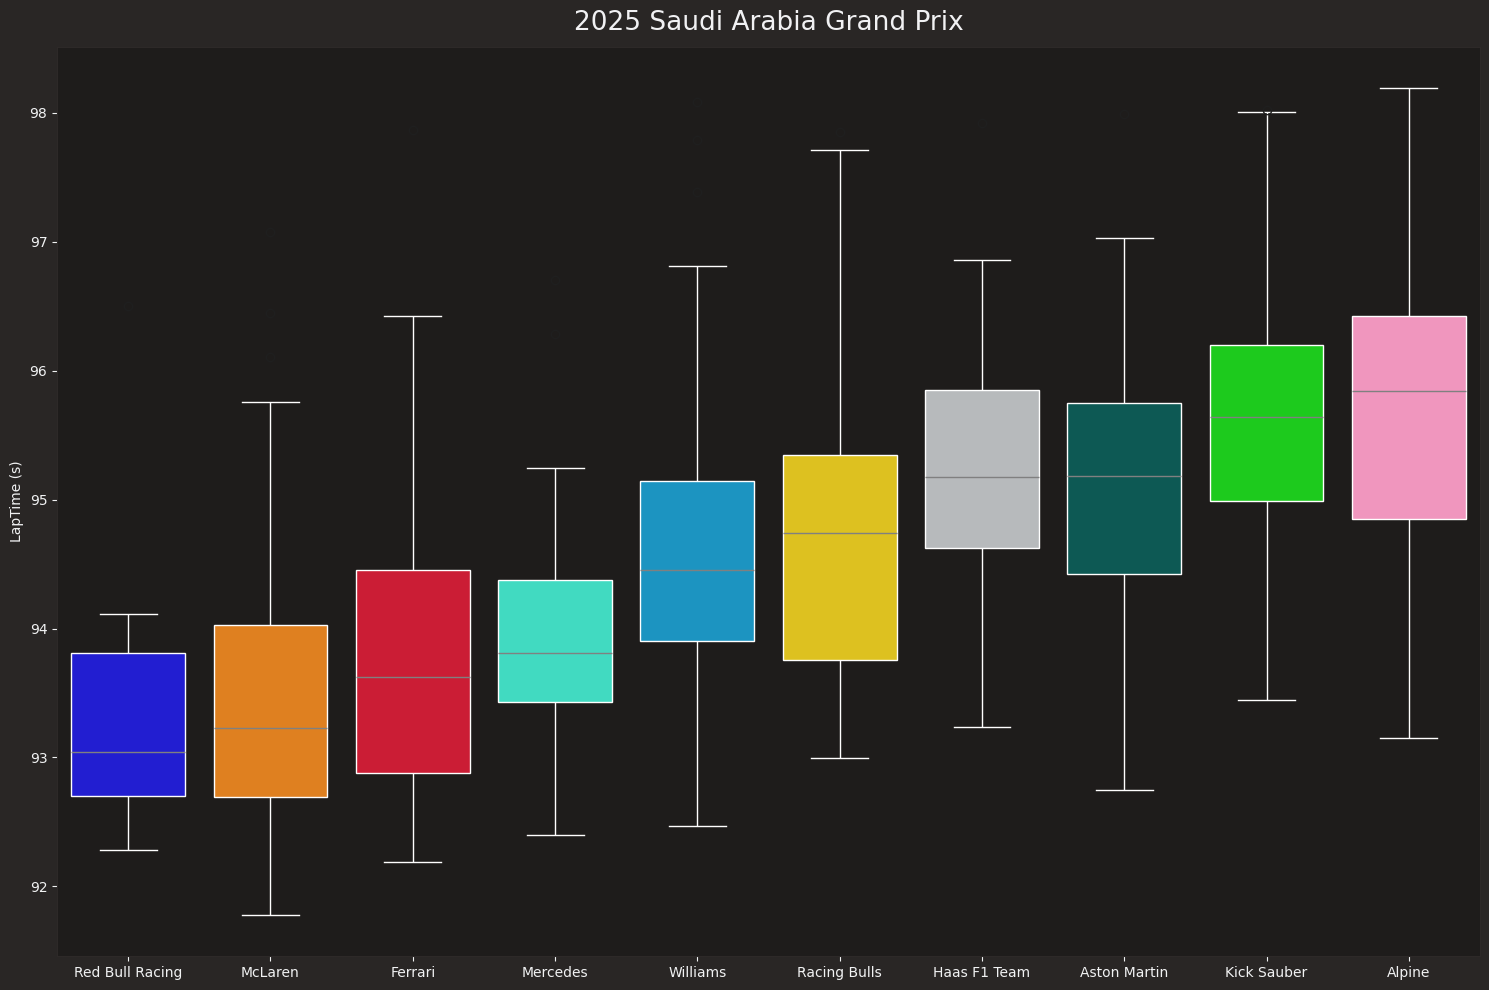

In [7]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("2025 Saudi Arabia Grand Prix")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

The second plot is separated by driver. As before, there are only 18 drivers
because two drivers (Tsunoda and Gasly) retired after a first-lap collision.

It is interesting to note that the order of drivers in this plot does not match
the finishing order in the race.

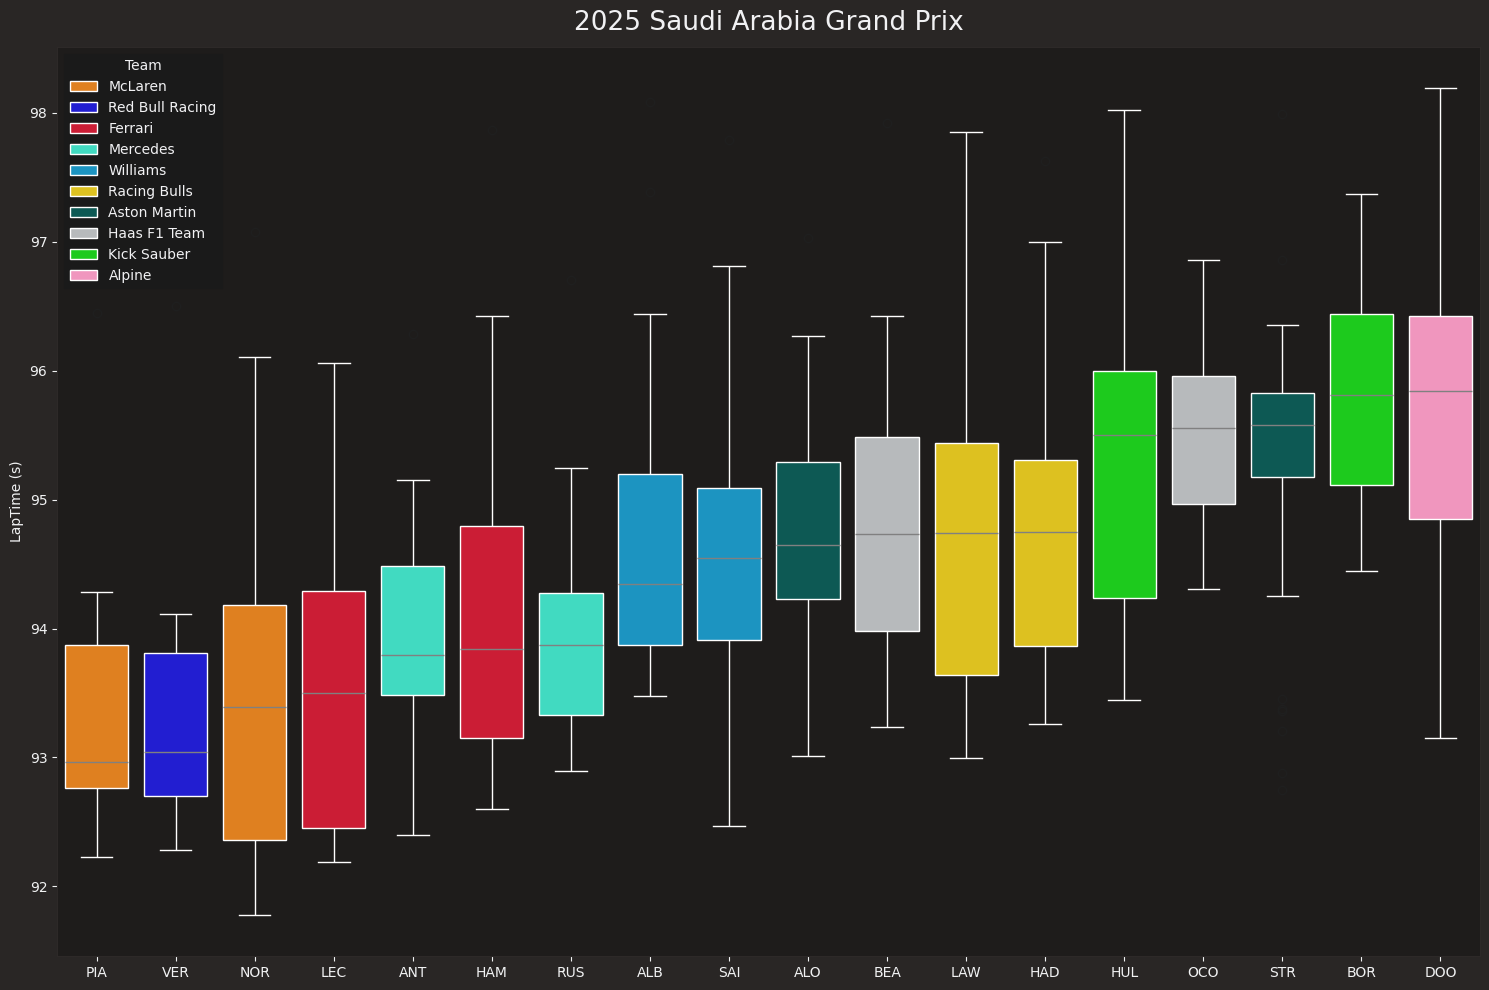

In [8]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Driver",
    y="LapTime (s)",
    hue="Team",
    order=driver_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("2025 Saudi Arabia Grand Prix")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

Here is a comparison of the drivers' order in the plot, compared to their order
on track:

| Driver     | Race | Plot | Difference |
|------------|------|------|------------|
| Piastri    | 1    | 1    | -          |
| Verstappen | 2    | 2    | -          |
| Leclerc    | 3    | 4    | -1         |
| Norris     | 4    | 3    | +1         |
| Russell    | 5    | 7    | -2         |
| Antonelli  | 6    | 5    | +1         |
| Hamilton   | 7    | 6    | +1         |
| Sainz      | 8    | 9    | -1         |
| Albon      | 9    | 8    | +1         |
| Hadjar     | 10   | 13   | -3         |
| Alonso     | 11   | 10   | +1         |
| Lawson     | 12   | 12   | -          |
| Bearman    | 13   | 11   | +2         |
| Ocon       | 14   | 15   | -1         |
| Hulkenberg | 15   | 14   | +1         |
| Stroll     | 16   | 16   | -          |
| Doohan     | 17   | 18   | -1         |
| Bortoleto  | 18   | 17   | +1         |



---

This is the end of the notebook.